In [3]:
import tensorflow as tf
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn import preprocessing

In [4]:
df = pd.read_csv('archive/Cancer_Data.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


In [7]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [8]:
df.shape

(569, 33)

In [9]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [10]:
df['Unnamed: 32'].head(10)

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
5   NaN
6   NaN
7   NaN
8   NaN
9   NaN
Name: Unnamed: 32, dtype: float64

<Axes: >

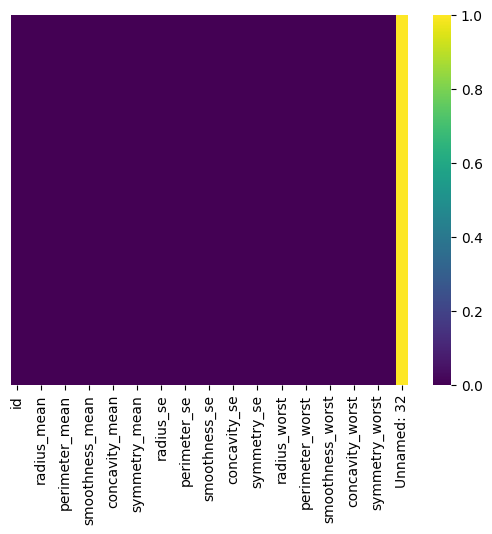

In [11]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=True, cmap='viridis')

In [12]:
le = preprocessing.LabelEncoder()
le.fit(df['diagnosis'])

LabelEncoder()

In [13]:
df['diagnosis'] = le.transform(df['diagnosis'])

<Axes: xlabel='diagnosis', ylabel='radius_mean'>

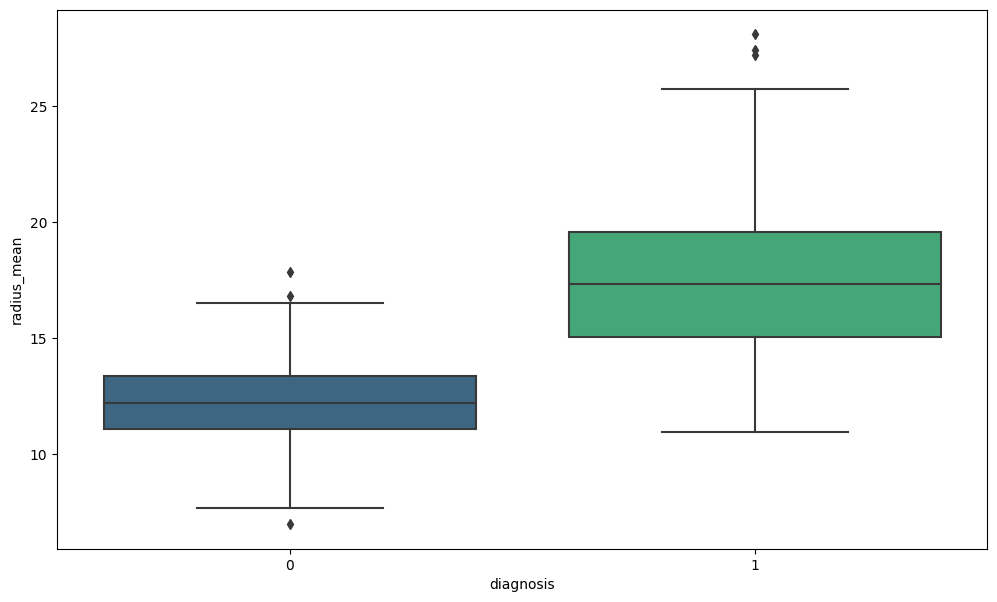

In [14]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='diagnosis', y='radius_mean', data=df, palette='viridis')

In [15]:
X = df[df.columns[2:-1]]
y = df['diagnosis']

In [16]:
# Benign, malignant
sum(y == 0) , sum(y == 1)

(357, 212)

<Axes: >

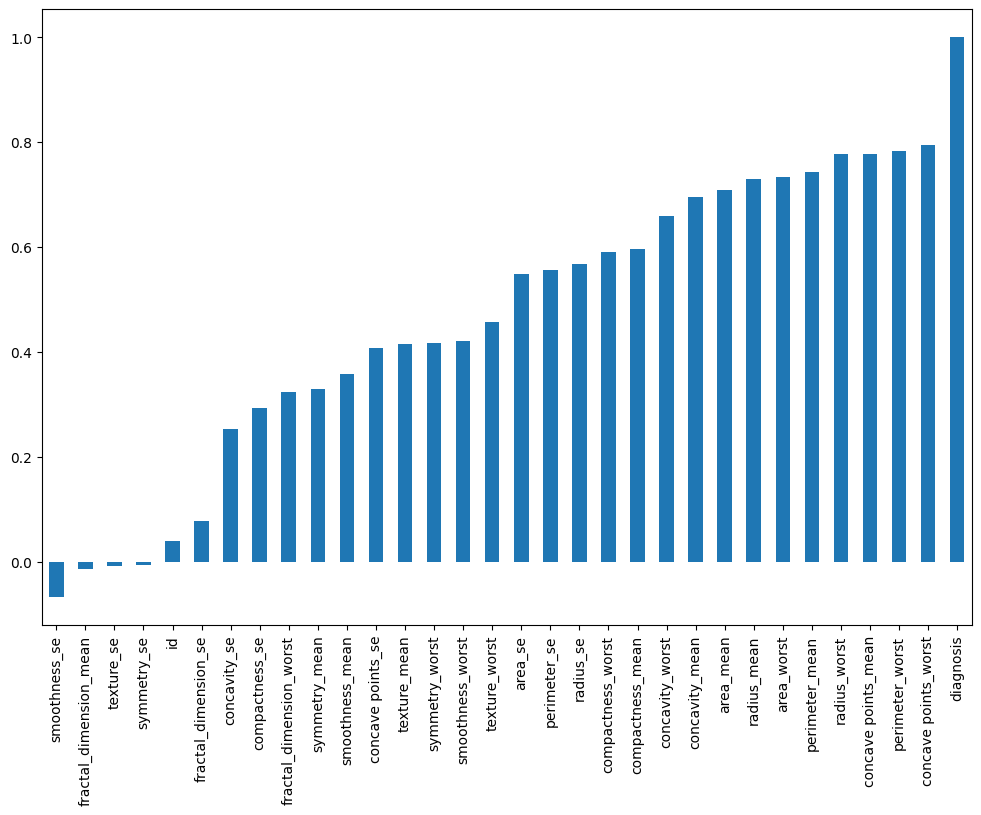

In [17]:
plt.figure(figsize=(12, 8))
df.corr()['diagnosis'][:-1].sort_values().plot(kind='bar')

<Axes: >

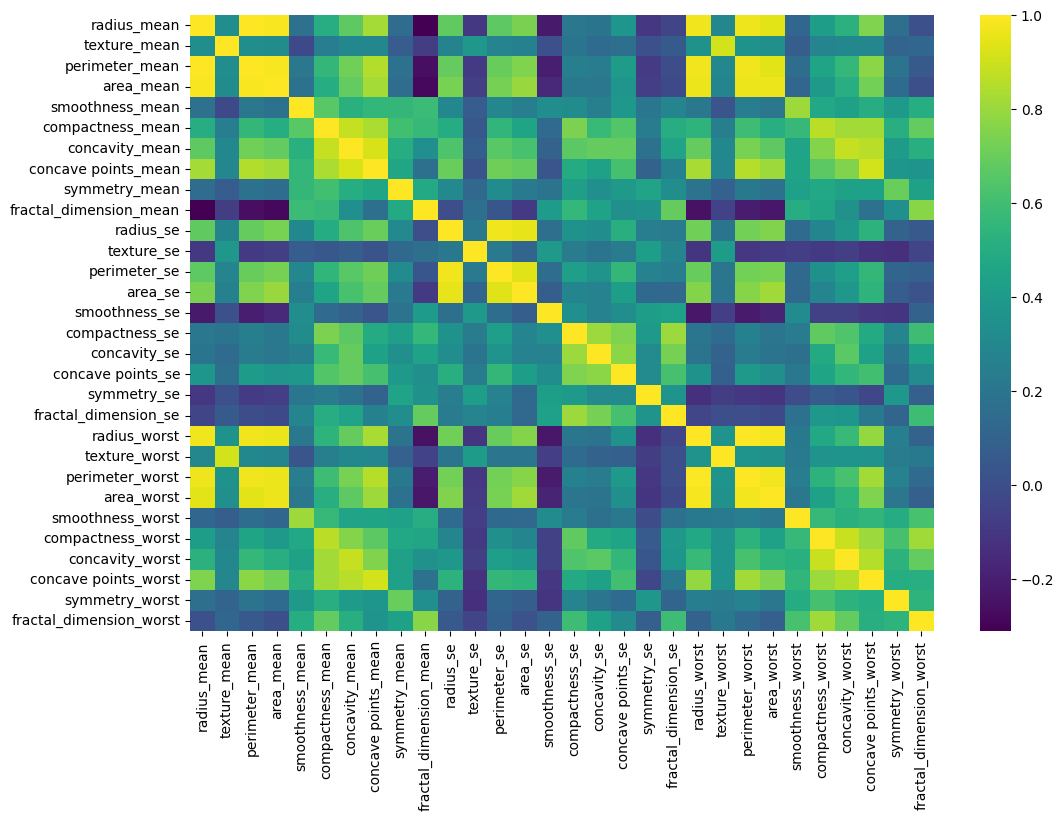

In [18]:
plt.figure(figsize=(12, 8))
sns.heatmap(X.corr(), cmap='viridis')

In [19]:
X = df[df.columns[2:-1]].values
y = df['diagnosis'].values

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(
  X, y, test_size=0.25, random_state=101)

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [43]:
y_train.shape

(426,)

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [22]:
model = Sequential()
model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [23]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test))

Epoch 1/600
14/14 [==============================] - 1s 29ms/step - loss: 0.6389 - val_loss: 0.6090
Epoch 2/600
14/14 [==============================] - 0s 7ms/step - loss: 0.5850 - val_loss: 0.5599
Epoch 3/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5350 - val_loss: 0.5074
Epoch 4/600
14/14 [==============================] - 0s 6ms/step - loss: 0.4835 - val_loss: 0.4549
Epoch 5/600
14/14 [==============================] - 0s 6ms/step - loss: 0.4335 - val_loss: 0.4040
Epoch 6/600
14/14 [==============================] - 0s 8ms/step - loss: 0.3896 - val_loss: 0.3592
Epoch 7/600
14/14 [==============================] - 0s 8ms/step - loss: 0.3488 - val_loss: 0.3231
Epoch 8/600
14/14 [==============================] - 0s 15ms/step - loss: 0.3148 - val_loss: 0.2902
Epoch 9/600
14/14 [==============================] - 0s 7ms/step - loss: 0.2879 - val_loss: 0.2655
Epoch 10/600
14/14 [==============================] - 0s 7ms/step - loss: 0.2638 - val_loss: 0.2408
Epoch 1

In [24]:
losses = pd.DataFrame(model.history.history)

In [25]:
losses.head()

,loss,val_loss
0,0.638926,0.608989
1,0.584987,0.559924
2,0.535018,0.507443
3,0.483455,0.454885
4,0.433462,0.403956


<Axes: >

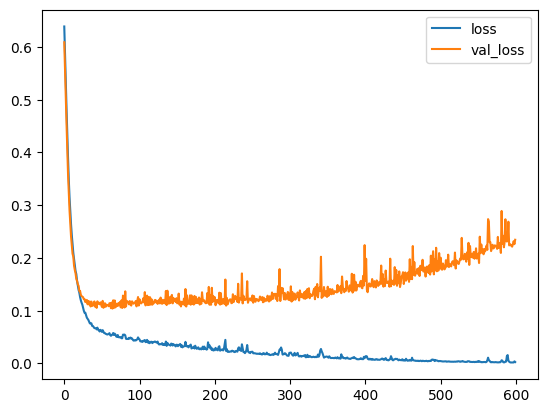

In [26]:
losses.plot()

In [27]:
predict_x=(model.predict(X_test) > 0.5).astype(int)

5/5 [==============================] - 0s 3ms/step


In [28]:
print(classification_report(y_test, predict_x))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96        88
           1       0.91      0.96      0.94        55

    accuracy                           0.95       143
   macro avg       0.95      0.95      0.95       143
weighted avg       0.95      0.95      0.95       143



In [29]:
confusion_matrix(y_test,predict_x)

array([[83,  5],
       [ 2, 53]], dtype=int64)

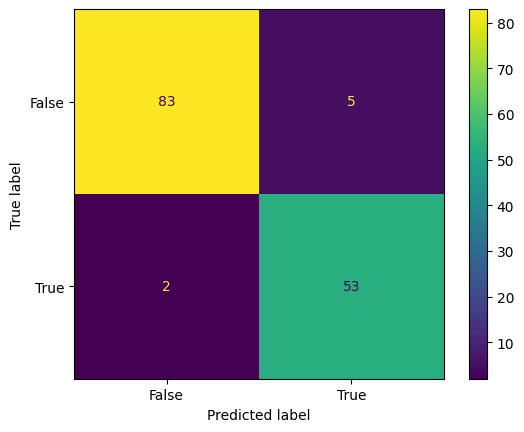

In [30]:
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, predict_x)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()


In [31]:
from tensorflow.keras.callbacks import EarlyStopping

In [32]:
model_v2 = Sequential()
model_v2.add(Dense(30, activation='relu'))
model_v2.add(Dense(15, activation='relu'))
model_v2.add(Dense(1, activation='sigmoid'))

model_v2.compile(loss='binary_crossentropy', optimizer='adam')
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

model_v2.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test),
            callbacks = [early_stop])

Epoch 1/600
14/14 [==============================] - 1s 24ms/step - loss: 0.6819 - val_loss: 0.6731
Epoch 2/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6614 - val_loss: 0.6541
Epoch 3/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6408 - val_loss: 0.6327
Epoch 4/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6173 - val_loss: 0.6086
Epoch 5/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5907 - val_loss: 0.5804
Epoch 6/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5634 - val_loss: 0.5508
Epoch 7/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5349 - val_loss: 0.5237
Epoch 8/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5079 - val_loss: 0.4998
Epoch 9/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4850 - val_loss: 0.4775
Epoch 10/600
14/14 [==============================] - 0s 6ms/step - loss: 0.4645 - val_loss: 0.4571
Epoch 11

<Axes: >

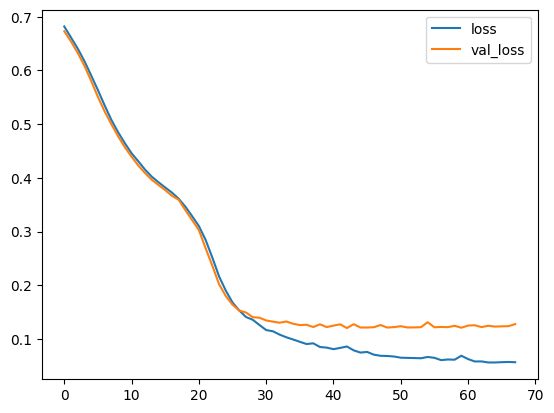

In [33]:
model_v2_loss = pd.DataFrame(model_v2.history.history)
model_v2_loss.plot()

In [34]:
predict_x_v2=(model_v2.predict(X_test) > 0.5).astype(int)

5/5 [==============================] - 0s 2ms/step


In [35]:
print(classification_report(y_test, predict_x_v2))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98        88
           1       0.95      0.98      0.96        55

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



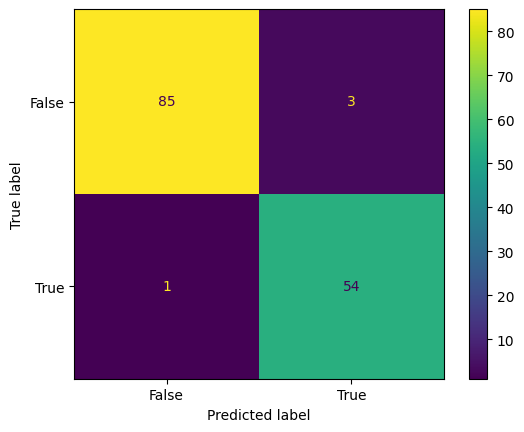

In [36]:
confusion_matrix_2 = metrics.confusion_matrix(y_test, predict_x_v2)
cm_display_2 = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_2, display_labels = [False, True])

cm_display_2.plot()
plt.show()

In [37]:
from tensorflow.keras.layers import Dropout

In [38]:
model_v3 = Sequential()

model_v3.add(Dense(30, activation='relu'))
model_v3.add(Dropout(0.5))

model_v3.add(Dense(15, activation='relu'))
model_v3.add(Dropout(0.5))

model_v3.add(Dense(1, activation='sigmoid'))

model_v3.compile(loss='binary_crossentropy', optimizer='adam')

model_v3.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test),
            callbacks = [early_stop])

Epoch 1/600
14/14 [==============================] - 1s 26ms/step - loss: 0.7415 - val_loss: 0.6559
Epoch 2/600
14/14 [==============================] - 0s 7ms/step - loss: 0.6828 - val_loss: 0.6342
Epoch 3/600
14/14 [==============================] - 0s 7ms/step - loss: 0.6618 - val_loss: 0.6158
Epoch 4/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6481 - val_loss: 0.5983
Epoch 5/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6353 - val_loss: 0.5773
Epoch 6/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6022 - val_loss: 0.5486
Epoch 7/600
14/14 [==============================] - 0s 7ms/step - loss: 0.5948 - val_loss: 0.5297
Epoch 8/600
14/14 [==============================] - 0s 7ms/step - loss: 0.5433 - val_loss: 0.5038
Epoch 9/600
14/14 [==============================] - 0s 7ms/step - loss: 0.5484 - val_loss: 0.4787
Epoch 10/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5361 - val_loss: 0.4582
Epoch 11

<Axes: >

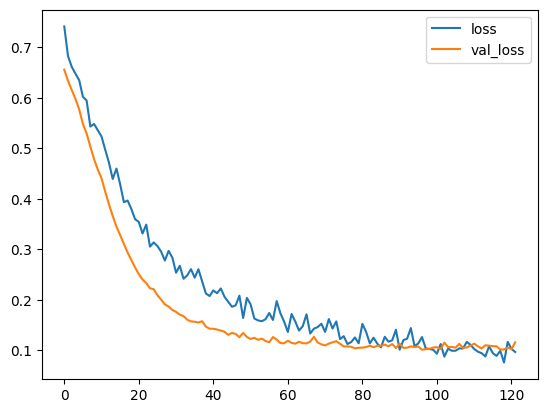

In [39]:
model_v3_loss = pd.DataFrame(model_v3.history.history)
model_v3_loss.plot()

In [40]:
predict_x_v3=(model_v3.predict(X_test) > 0.5).astype(int)

5/5 [==============================] - 0s 1ms/step


In [41]:
print(classification_report(y_test, predict_x_v3))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98        88
           1       0.95      0.98      0.96        55

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



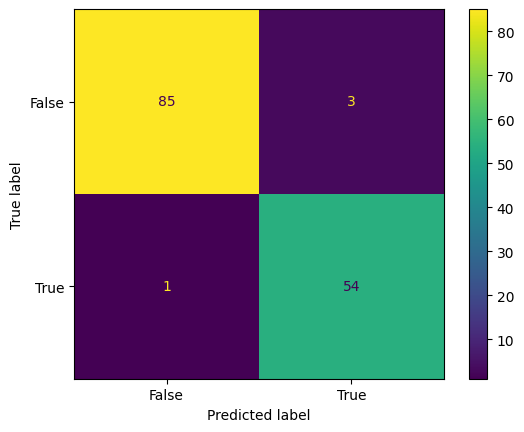

In [42]:
confusion_matrix_3 = metrics.confusion_matrix(y_test, predict_x_v3)
cm_display_3 = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_3, display_labels = [False, True])

cm_display_3.plot()
plt.show()